In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('COVID-19_Daily.csv')
df['Date'] = pd.to_datetime(df['Date'])

print(df.info())
print("________________________________________________________________________________________________________________________________________________")
print(df.isnull().sum())
print("________________________________________________________________________________________________________________________________________________")
print(df.describe())
print("________________________________________________________________________________________________________________________________________________")
total_tests = df['Daily Tests'].sum()
print("________________________________________________________________________________________________________________________________________________")
print(f"Total tests performed till September 01, 2020: {total_tests}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              188 non-null    datetime64[ns]
 1   Daily Tests       175 non-null    float64       
 2   Daily Cases       178 non-null    float64       
 3   Daily Recoveries  175 non-null    float64       
 4   Daily Deaths      175 non-null    float64       
 5   Lockdown          48 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 9.0+ KB
None
________________________________________________________________________________________________________________________________________________
Date                  1
Daily Tests          14
Daily Cases          11
Daily Recoveries     14
Daily Deaths         14
Lockdown            141
dtype: int64
______________________________________________________________________________________

C:\Users\HP\AppData\Local\Temp\ipykernel_8072\1575327441.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


C:\Users\HP\AppData\Local\Temp\ipykernel_16364\1198430656.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0', '5k', '10k', '15k', '20k', '25k', '30k'])


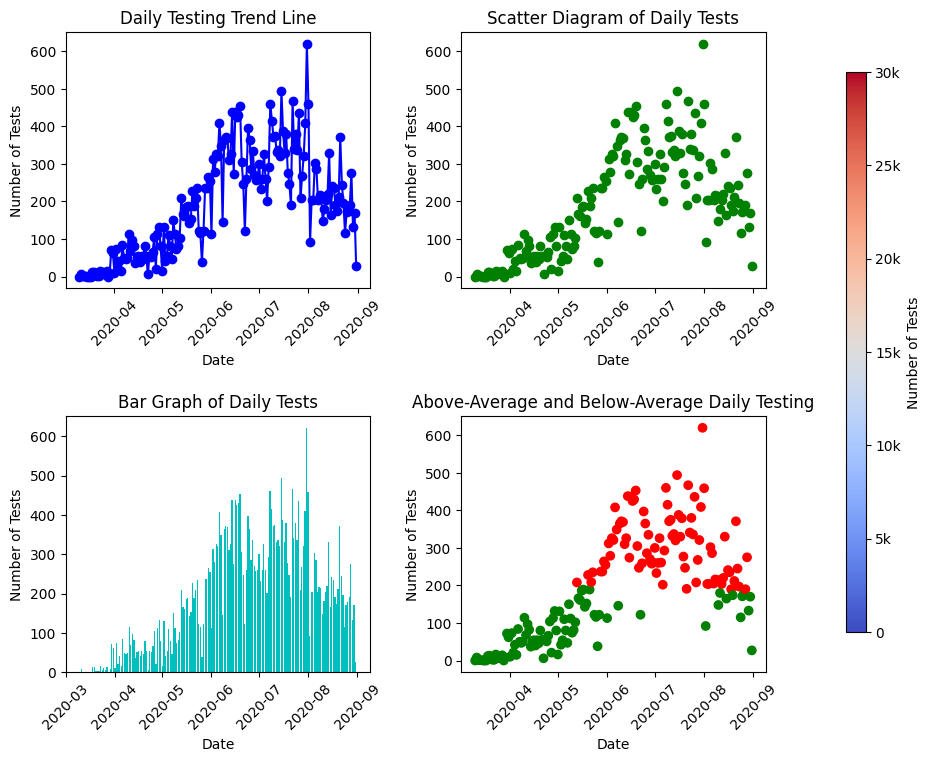

In [14]:
import matplotlib.colors as mcolors
df['Date'] = pd.to_datetime(df['Date'])

average_tests = df['Daily Tests'].mean()

fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0, 0].plot(df['Date'], df['Daily Tests'], marker='o', linestyle='-', color='b', label='Daily Tests')
axs[0, 0].set_title('Daily Testing Trend Line')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Number of Tests')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[0, 1].scatter(df['Date'], df['Daily Tests'], color='g', label='Daily Tests')
axs[0, 1].set_title('Scatter Diagram of Daily Tests')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Number of Tests')
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].bar(df['Date'], df['Daily Tests'], color='c', label='Daily Tests')
axs[1, 0].set_title('Bar Graph of Daily Tests')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Number of Tests')
axs[1, 0].tick_params(axis='x', rotation=45)

colors = ['r' if x > average_tests else 'g' for x in df['Daily Tests']]
scatter = axs[1, 1].scatter(df['Date'], df['Daily Tests'], color=colors, label='Daily Tests')
axs[1, 1].set_title('Above-Average and Below-Average Daily Testing')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Number of Tests')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1, wspace=0.3, hspace=0.5)

norm = mcolors.Normalize(vmin=0, vmax=30000)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # Adjust these numbers to change position and size
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Number of Tests')
cbar.ax.set_yticklabels(['0', '5k', '10k', '15k', '20k', '25k', '30k'])

plt.show()

In [14]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month

weekly_stats = df.groupby('Week').agg({
    'Daily Tests': 'sum',
    'Daily Cases': 'sum',
    'Daily Recoveries': 'sum',
    'Daily Deaths': 'sum'
}).reset_index()

monthly_stats = df.groupby('Month').agg({
    'Daily Tests': 'sum',
    'Daily Cases': 'sum',
    'Daily Recoveries': 'sum',
    'Daily Deaths': 'sum'
}).reset_index()

weekly_max = weekly_stats.max()
weekly_min = weekly_stats.min()
print("Weekly Stats - Max Values:\n", weekly_max)
print("________________________________________________________________________________________________________________________________________________")
print("Weekly Stats - Min Values:\n", weekly_min)
print("________________________________________________________________________________________________________________________________________________")
monthly_max = monthly_stats.max()
monthly_min = monthly_stats.min()
print("Monthly Stats - Max Values:\n", monthly_max)
print("________________________________________________________________________________________________________________________________________________")
print("Monthly Stats - Min Values:\n", monthly_min)
print("________________________________________________________________________________________________________________________________________________")
population = 220_000_000  # Estimated population of Pakistan

df['Tests Per Thousand'] = (df['Daily Tests'] / population) * 1000
df['Cases Per Thousand'] = (df['Daily Cases'] / population) * 1000
df['Recoveries Per Thousand'] = (df['Daily Recoveries'] / population) * 1000
df['Deaths Per Thousand'] = (df['Daily Deaths'] / population) * 1000

df['Tests Per Million'] = (df['Daily Tests'] / population) * 1_000_000
df['Cases Per Million'] = (df['Daily Cases'] / population) * 1_000_000
df['Recoveries Per Million'] = (df['Daily Recoveries'] / population) * 1_000_000
df['Deaths Per Million'] = (df['Daily Deaths'] / population) * 1_000_000

Weekly Stats - Max Values:
 Week                  36.0
Daily Tests         2570.0
Daily Cases          316.0
Daily Recoveries     288.0
Daily Deaths           8.0
dtype: float64
________________________________________________________________________________________________________________________________________________
Weekly Stats - Min Values:
 Week                9.0
Daily Tests         0.0
Daily Cases         0.0
Daily Recoveries    0.0
Daily Deaths        0.0
dtype: float64
________________________________________________________________________________________________________________________________________________
Monthly Stats - Max Values:
 Month                   8.0
Daily Tests         10577.0
Daily Cases           991.0
Daily Recoveries     1092.0
Daily Deaths           24.0
dtype: float64
________________________________________________________________________________________________________________________________________________
Monthly Stats - Min Values:
 Month      

In [15]:
df['Daily Tests'].fillna(df['Daily Tests'].mean(), inplace=True)
df['Daily Cases'].fillna(df['Daily Cases'].mean(), inplace=True)
df['Daily Recoveries'].fillna(df['Daily Recoveries'].mean(), inplace=True)
df['Daily Deaths'].fillna(df['Daily Deaths'].mean(), inplace=True)

X = df[['Daily Tests', 'Daily Cases', 'Daily Recoveries']].values
y_cases = df['Daily Cases'].values
y_deaths = df['Daily Deaths'].values

X_train, X_test, y_cases_train, y_cases_test = train_test_split(X, y_cases, test_size=0.2, random_state=0)
X_train, X_test, y_deaths_train, y_deaths_test = train_test_split(X, y_deaths, test_size=0.2, random_state=0)

model_cases = LinearRegression()
model_cases.fit(X_train, y_cases_train)

model_deaths = DecisionTreeRegressor(random_state=0)
model_deaths.fit(X_train, y_deaths_train)

cases_predictions = model_cases.predict(X_test)
deaths_predictions = model_deaths.predict(X_test)

print("Cases Predictions: ", cases_predictions)
print("________________________________________________________________________________________________________________________________________________")
print("Deaths Predictions: ", deaths_predictions)

Cases Predictions:  [ 3.00000000e+01  3.88252597e-16  1.10000000e+01  4.00000000e+00
  2.20000000e+01  2.00000000e+00 -1.77635684e-15  1.60000000e+01
  4.80000000e+01  1.29213483e+01  1.29213483e+01  4.00000000e+00
  1.10000000e+01  7.00000000e+00  1.30000000e+01  2.90000000e+01
  2.00000000e+00  1.00000000e+00  3.20000000e+01  4.10000000e+01
 -1.60084797e-15  3.00000000e+01  2.60000000e+01  9.00000000e+00
  1.20000000e+01  1.10000000e+01  1.00000000e+00  4.00000000e+00
  3.20000000e+01  3.29749640e-16  1.29213483e+01  1.00000000e+00
  1.70000000e+01  1.00000000e+00  1.00000000e+00 -1.30833318e-15
  7.00000000e+00  5.60000000e+01]
________________________________________________________________________________________________________________________________________________
Deaths Predictions:  [0.         0.         2.         1.         1.         0.
 0.         1.         3.         0.35428571 0.35428571 0.
 0.         0.35428571 0.         0.         0.         0.
 4.         0.    

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

covid_data = pd.read_csv('COVID-19_Daily.csv')

covid_data_cleaned = covid_data.dropna(subset=['Daily Tests', 'Daily Cases', 'Daily Recoveries'])
covid_data_cleaned['Date'] = pd.to_datetime(covid_data_cleaned['Date'], format='%d-%b-%y')
covid_data_cleaned.set_index('Date', inplace=True)
weekly_stats = covid_data_cleaned.resample('W').sum()
monthly_stats = covid_data_cleaned.resample('M').sum()


C:\Users\HP\AppData\Local\Temp\ipykernel_8072\3679488120.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_cleaned['Date'] = pd.to_datetime(covid_data_cleaned['Date'], format='%d-%b-%y')


In [12]:
def plot_periodic_data(data, period_type, column_name, title):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Trendline Plot
    axs[0, 0].plot(data.index, data[column_name], color='b', label=f'{column_name} Trend Line ({period_type})')
    axs[0, 0].set_title(f'{title} Trend Line ({period_type})')
    axs[0, 0].set_xlabel('Date')
    axs[0, 0].set_ylabel(column_name)

    # Scatter Plot 1 
    axs[0, 1].scatter(data.index, data[column_name], color='c', label=f'{column_name} ({period_type})')
    axs[0, 1].set_title(f'{title} Scatter Plot ({period_type})')
    axs[0, 1].set_xlabel('Date')
    axs[0, 1].set_ylabel(column_name)

    # Scatter Plot 2 
    avg_value = data[column_name].mean()
    above_avg = data[data[column_name] > avg_value]
    below_avg = data[data[column_name] <= avg_value]

    axs[1, 0].scatter(above_avg.index, above_avg[column_name], color='r', label='Above Average')
    axs[1, 0].scatter(below_avg.index, below_avg[column_name], color='g', label='Below Average')
    axs[1, 0].set_title(f'{title} Scatter Plot (Red: Above Avg, Green: Below Avg) ({period_type})')
    axs[1, 0].set_xlabel('Date')
    axs[1, 0].set_ylabel(column_name)

    sns.barplot(x=data.index, y=data[column_name], ax=axs[1, 1], palette='Blues_d')
    axs[1, 1].set_title(f'{title} Bar Plot ({period_type})')
    axs[1, 1].set_xlabel('Date')
    axs[1, 1].set_ylabel(column_name)
    axs[1, 1].tick_params(axis='x', rotation=90)
    
    plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1, wspace=0.3, hspace=0.5)

    norm = mcolors.Normalize(vmin=0, vmax=data[column_name].max())
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])
    
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7]) 
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label(f'{column_name} ({period_type})')
    cbar.ax.set_yticklabels([f'{int(t)}' for t in sm.get_array()])

    plt.show()

    


C:\Users\HP\AppData\Local\Temp\ipykernel_14176\3878304924.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[column_name], ax=axs[1, 1], palette='Blues_d')


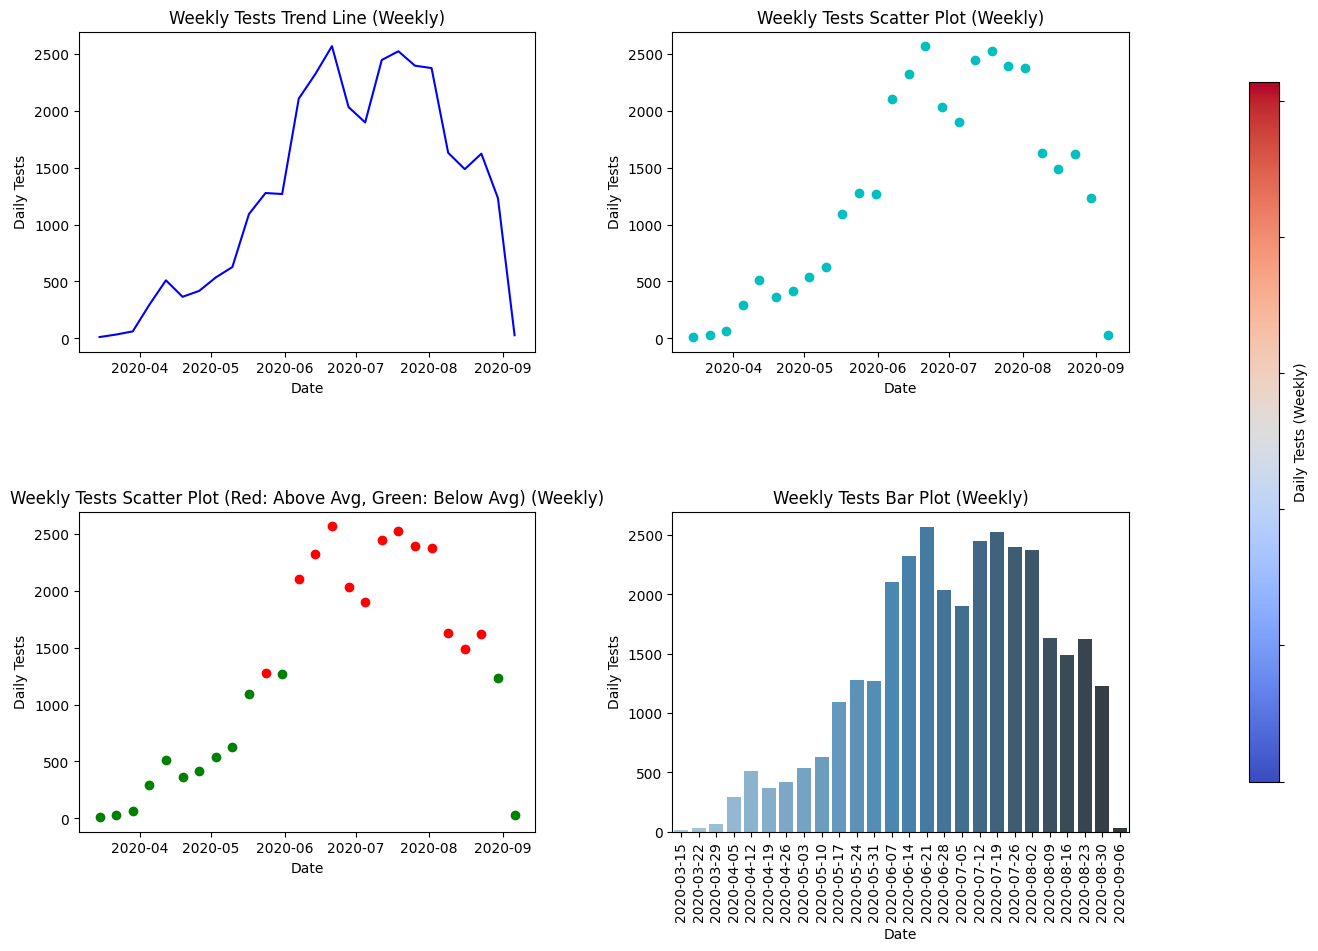

C:\Users\HP\AppData\Local\Temp\ipykernel_14176\3878304924.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[column_name], ax=axs[1, 1], palette='Blues_d')


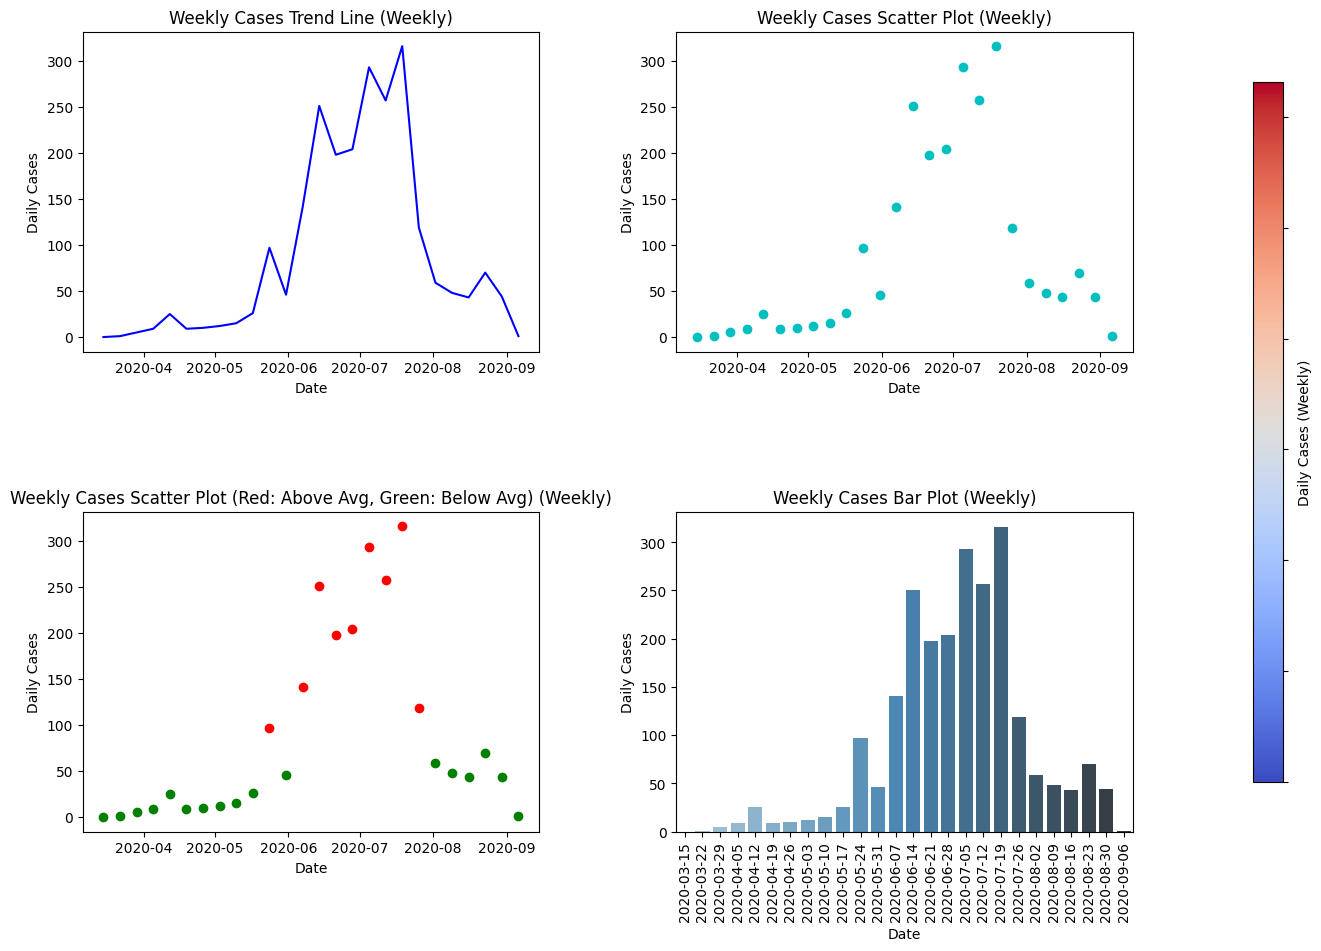

C:\Users\HP\AppData\Local\Temp\ipykernel_14176\3878304924.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[column_name], ax=axs[1, 1], palette='Blues_d')


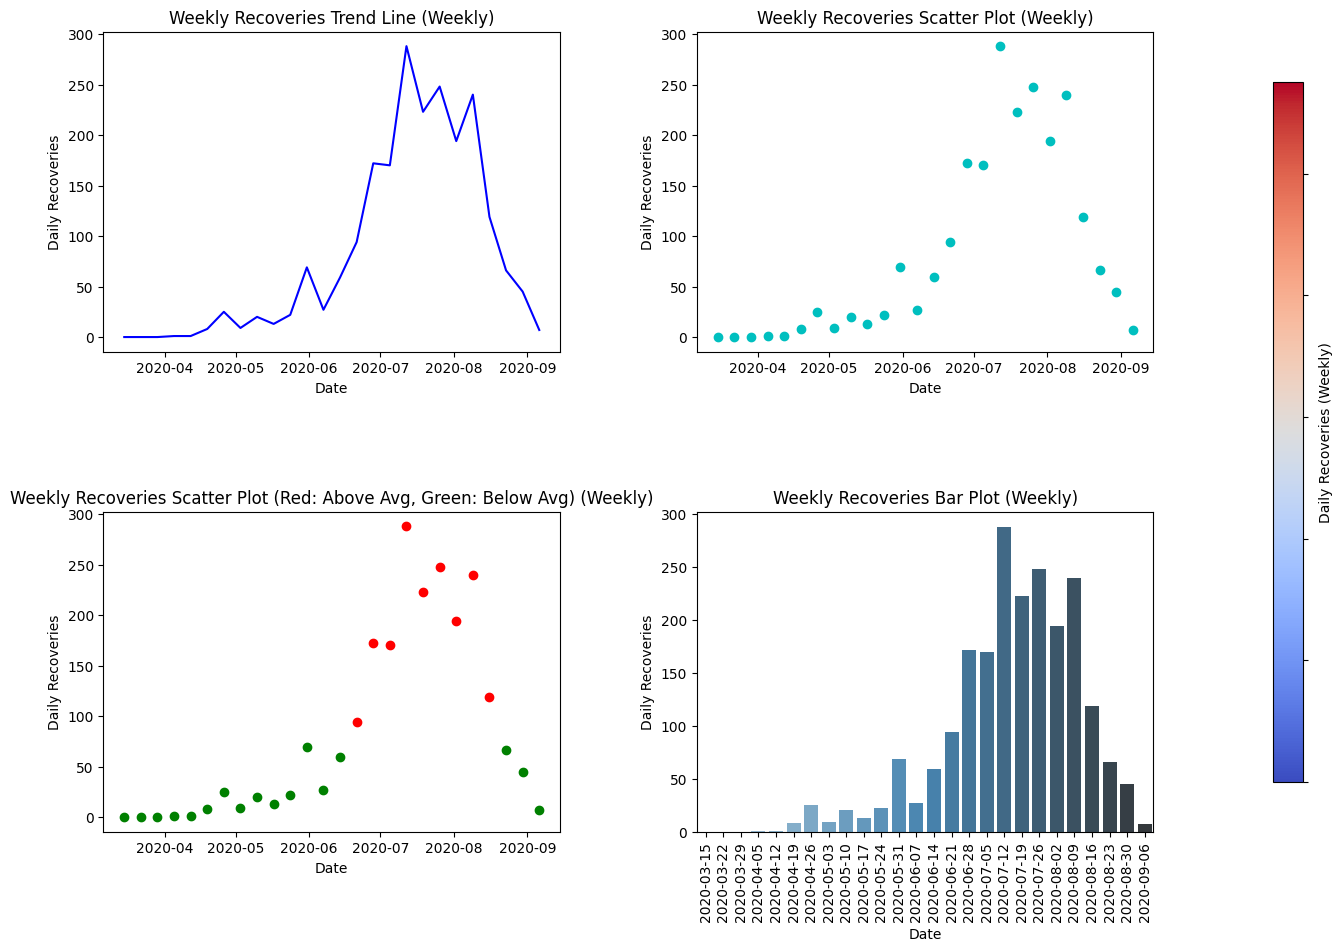

In [13]:
# Weekly Plots
plot_periodic_data(weekly_stats, 'Weekly', 'Daily Tests', 'Weekly Tests')
plot_periodic_data(weekly_stats, 'Weekly', 'Daily Cases', 'Weekly Cases')
plot_periodic_data(weekly_stats, 'Weekly', 'Daily Recoveries', 'Weekly Recoveries')


C:\Users\HP\AppData\Local\Temp\ipykernel_14176\3878304924.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[column_name], ax=axs[1, 1], palette='Blues_d')


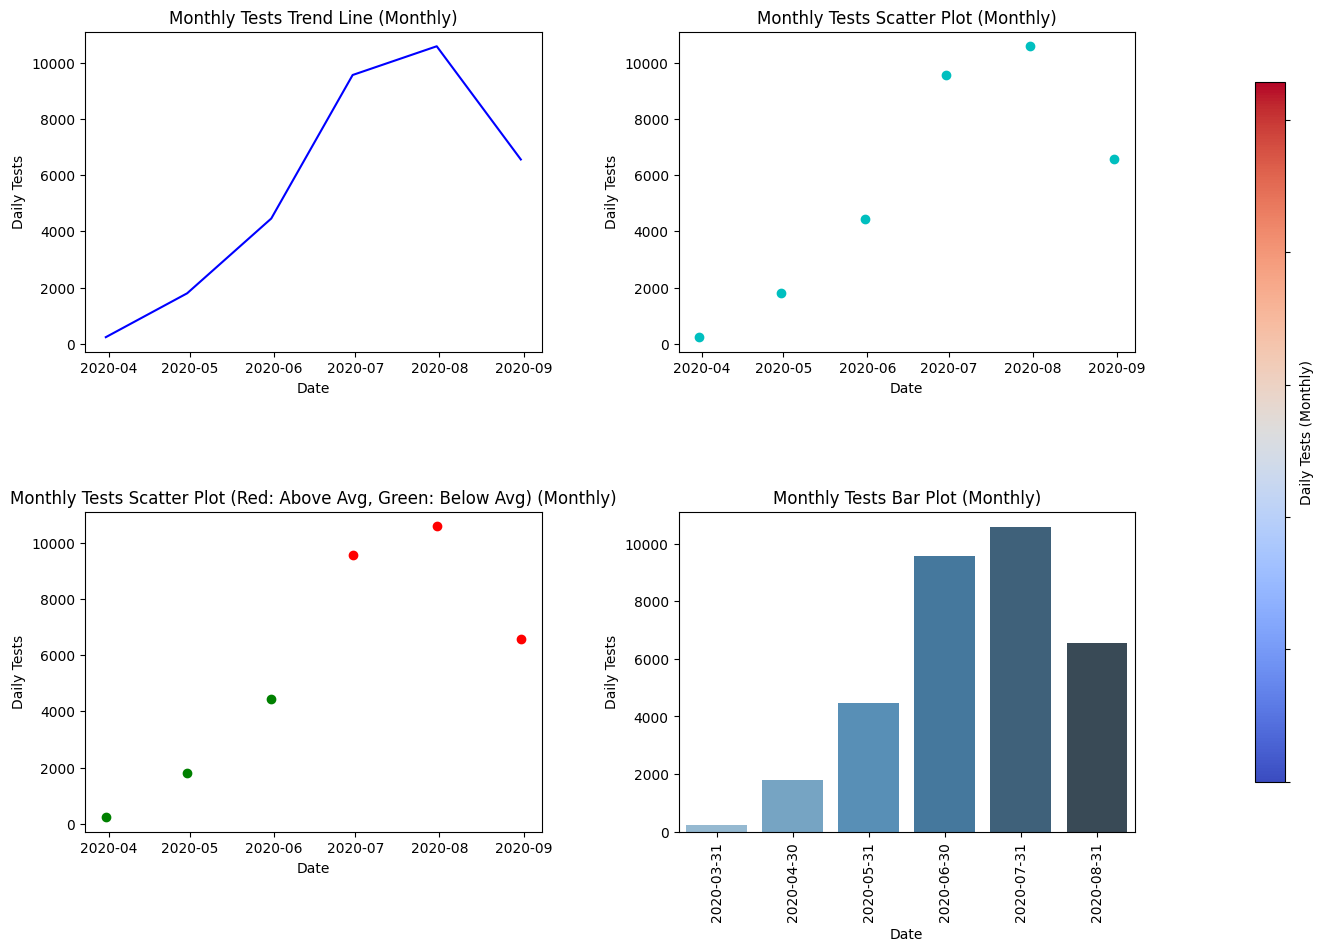

C:\Users\HP\AppData\Local\Temp\ipykernel_14176\3878304924.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[column_name], ax=axs[1, 1], palette='Blues_d')


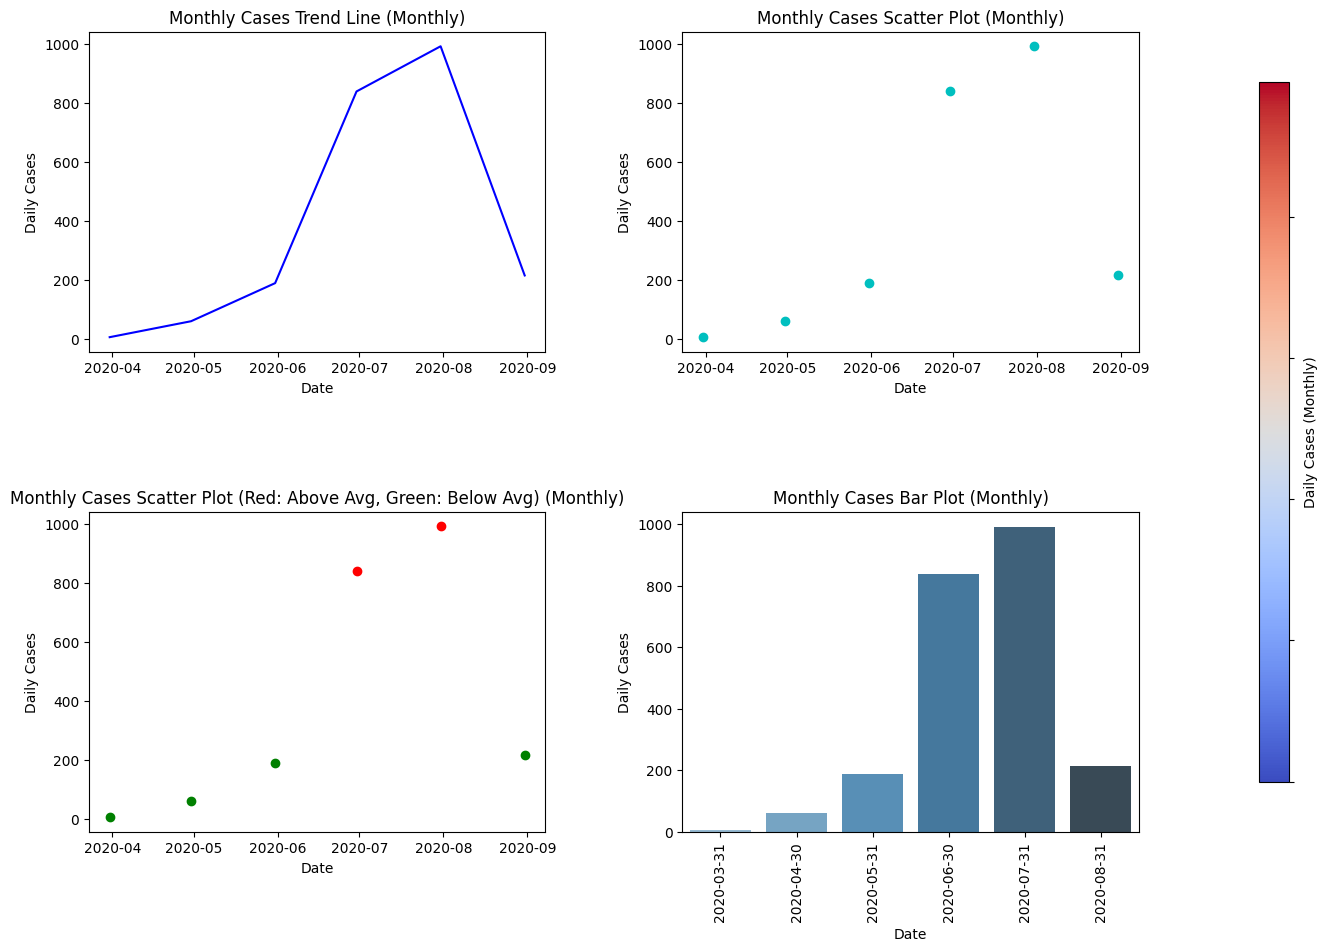

C:\Users\HP\AppData\Local\Temp\ipykernel_14176\3878304924.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data[column_name], ax=axs[1, 1], palette='Blues_d')


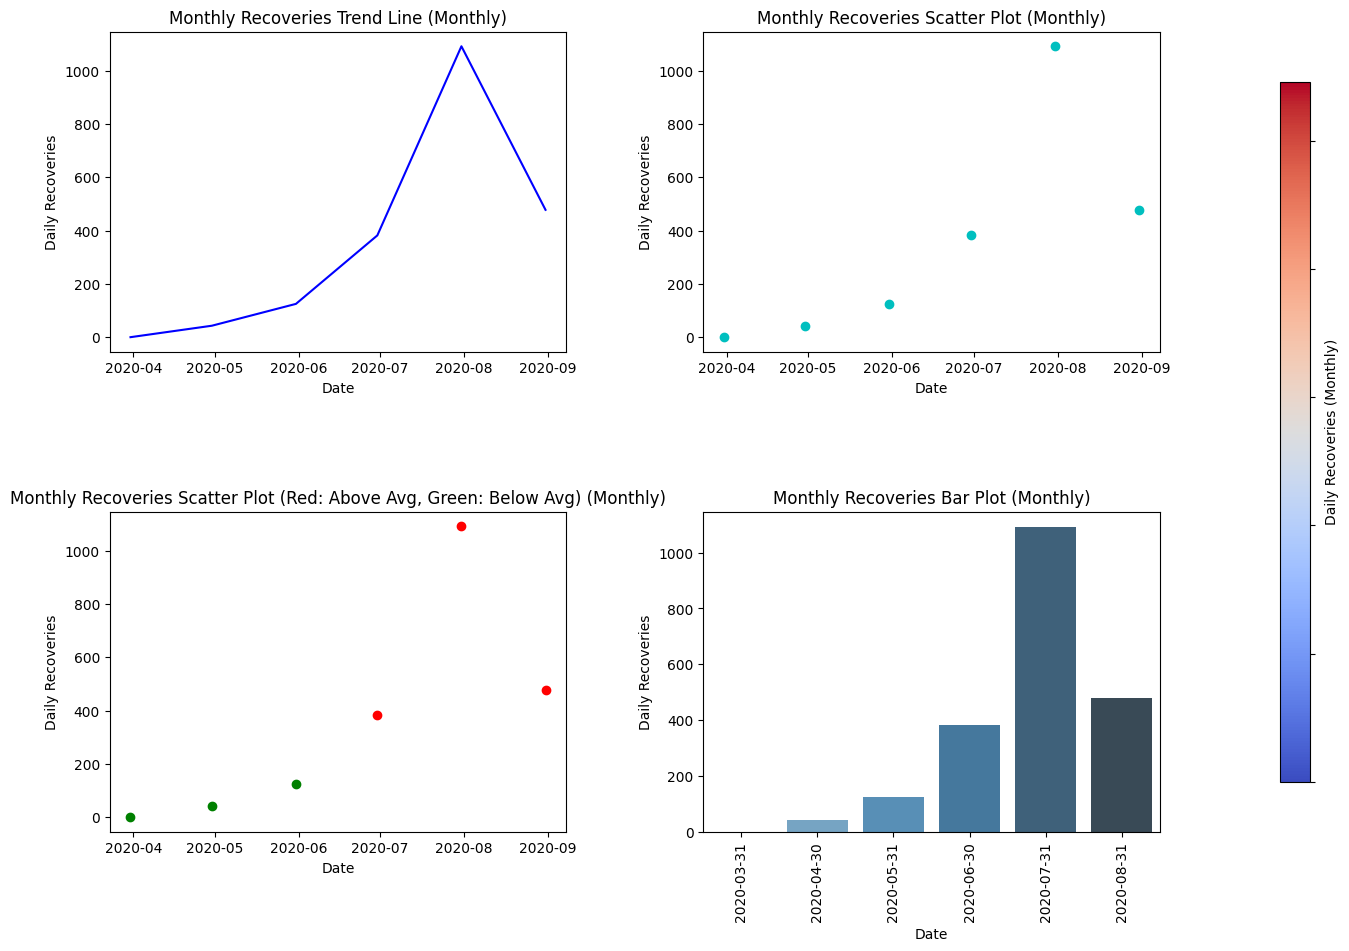

In [14]:
# Monthly Plots
plot_periodic_data(monthly_stats, 'Monthly', 'Daily Tests', 'Monthly Tests')
plot_periodic_data(monthly_stats, 'Monthly', 'Daily Cases', 'Monthly Cases')
plot_periodic_data(monthly_stats, 'Monthly', 'Daily Recoveries', 'Monthly Recoveries')


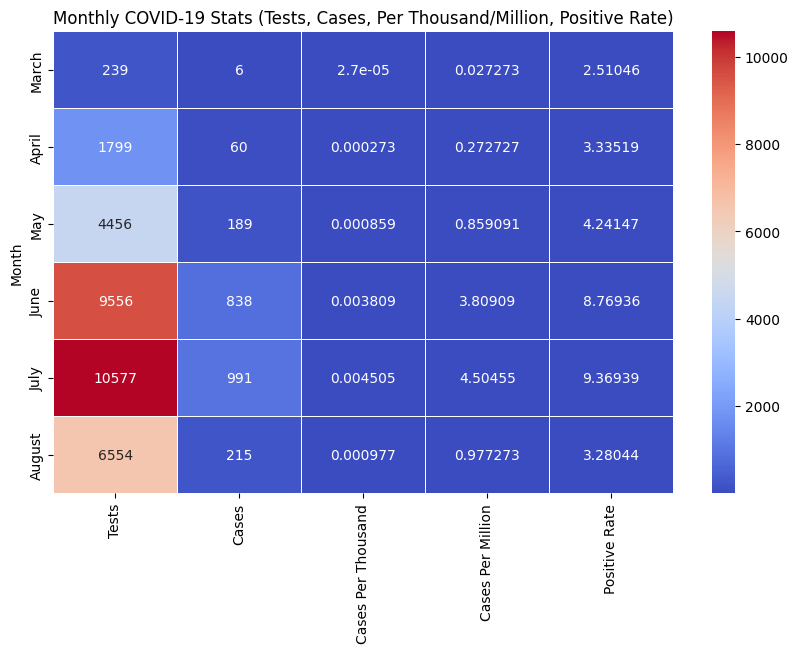

In [4]:
monthly_data = covid_data_cleaned.resample('M').sum()
population = 220_000_000 

monthly_data['Cases Per Thousand'] = (monthly_data['Daily Cases'] / population) * 1000
monthly_data['Cases Per Million'] = (monthly_data['Daily Cases'] / population) * 1_000_000
monthly_data['Positive Rate'] = (monthly_data['Daily Cases'] / monthly_data['Daily Tests']) * 100

monthly_data = monthly_data.round(6)

final_data = monthly_data[['Daily Tests', 'Daily Cases', 'Cases Per Thousand', 'Cases Per Million', 'Positive Rate']]

final_data.columns = ['Tests', 'Cases', 'Cases Per Thousand', 'Cases Per Million', 'Positive Rate']

final_data = final_data.reset_index()
final_data['Month'] = final_data['Date'].dt.strftime('%B')  # Convert date to month names
final_data = final_data.drop('Date', axis=1)  # Drop the original Date column

# Display the table with Seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(final_data.set_index('Month'), annot=True, fmt=".6g", cmap='coolwarm', linewidths=.5)

plt.title('Monthly COVID-19 Stats (Tests, Cases, Per Thousand/Million, Positive Rate)')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8072\3394855218.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Time'] = np.arange(len(train_data))
C:\Users\HP\AppData\Local\Temp\ipykernel_8072\3394855218.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Time'] = np.arange(len(train_data), len(train_data) + len(test_data))
C:\Users\HP\AppData\Local\Temp\ipykernel_8072\3394855218.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

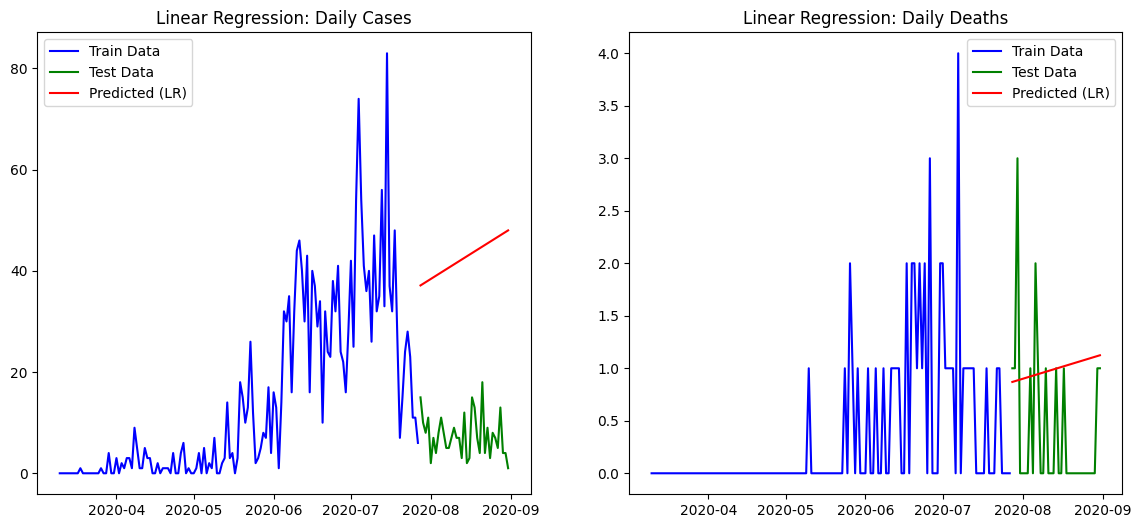

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

covid_data['Date'] = pd.to_datetime(covid_data['Date'], format='%d-%b-%y')
covid_data.set_index('Date', inplace=True)

data = covid_data[['Daily Cases', 'Daily Deaths']].dropna()

train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# -----------------------------------------
# Model 1: Linear Regression for Daily Cases and Deaths
# -----------------------------------------
train_data['Time'] = np.arange(len(train_data))
test_data['Time'] = np.arange(len(train_data), len(train_data) + len(test_data))

lr_model_cases = LinearRegression()
lr_model_deaths = LinearRegression()

lr_model_cases.fit(train_data[['Time']], train_data['Daily Cases'])
lr_model_deaths.fit(train_data[['Time']], train_data['Daily Deaths'])

test_data['Predicted Cases (LR)'] = lr_model_cases.predict(test_data[['Time']])
test_data['Predicted Deaths (LR)'] = lr_model_deaths.predict(test_data[['Time']])

# Plot the results for Daily Cases - Linear Regression
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(train_data.index, train_data['Daily Cases'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['Daily Cases'], label='Test Data', color='green')
plt.plot(test_data.index, test_data['Predicted Cases (LR)'], label='Predicted (LR)', color='red')
plt.title('Linear Regression: Daily Cases')
plt.legend()

# Plot the results for Daily Deaths - Linear Regression
plt.subplot(1, 2, 2)
plt.plot(train_data.index, train_data['Daily Deaths'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['Daily Deaths'], label='Test Data', color='green')
plt.plot(test_data.index, test_data['Predicted Deaths (LR)'], label='Predicted (LR)', color='red')
plt.title('Linear Regression: Daily Deaths')
plt.legend()
plt.show()


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmo

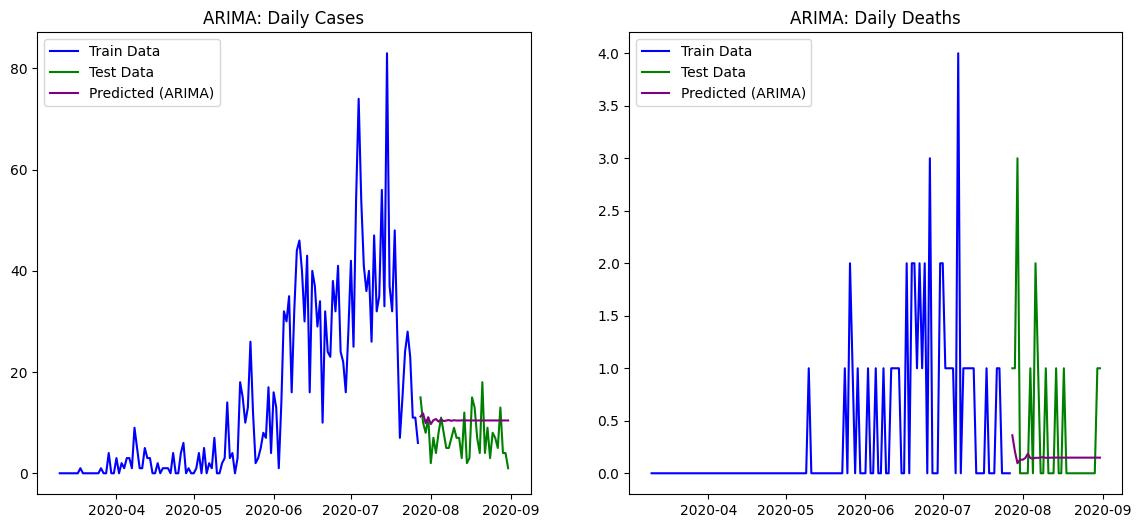

In [6]:
# -----------------------------------------
# Model 2: ARIMA for Daily Cases and Deaths
# -----------------------------------------
arima_model_cases = ARIMA(train_data['Daily Cases'], order=(5, 1, 0)) 
arima_fitted_cases = arima_model_cases.fit()

arima_forecast_cases = arima_fitted_cases.forecast(steps=len(test_data))

# ARIMA for Daily Deaths
arima_model_deaths = ARIMA(train_data['Daily Deaths'], order=(5, 1, 0)) 
arima_fitted_deaths = arima_model_deaths.fit()

arima_forecast_deaths = arima_fitted_deaths.forecast(steps=len(test_data))

test_data['Predicted Cases (ARIMA)'] = arima_forecast_cases.values
test_data['Predicted Deaths (ARIMA)'] = arima_forecast_deaths.values

# Plot the results for Daily Cases
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(train_data.index, train_data['Daily Cases'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['Daily Cases'], label='Test Data', color='green')
plt.plot(test_data.index, test_data['Predicted Cases (ARIMA)'], label='Predicted (ARIMA)', color='purple')
plt.title('ARIMA: Daily Cases')
plt.legend()

# Plot the results for Daily Deaths
plt.subplot(1, 2, 2)
plt.plot(train_data.index, train_data['Daily Deaths'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['Daily Deaths'], label='Test Data', color='green')
plt.plot(test_data.index, test_data['Predicted Deaths (ARIMA)'], label='Predicted (ARIMA)', color='purple')
plt.title('ARIMA: Daily Deaths')
plt.legend()
plt.show()

In [9]:
# -----------------------------------------
# Future Predictions using ARIMA
# -----------------------------------------
future_steps = 30
future_forecast_cases = arima_fitted_cases.forecast(steps=future_steps)
future_forecast_deaths = arima_fitted_deaths.forecast(steps=future_steps)
print(f"Future Daily Cases Prediction for next {future_steps} days:\n", future_forecast_cases)
print("________________________________________________________________________________________________________________________________________________")
print(f"Future Daily Deaths Prediction for next {future_steps} days:\n", future_forecast_deaths)


Future Daily Cases Prediction for next 30 days:
 2020-07-28    11.218845
2020-07-29    11.827904
2020-07-30     9.902337
2020-07-31    11.068333
2020-08-01     9.722622
2020-08-02    10.487639
2020-08-03    10.724061
2020-08-04    10.211395
2020-08-05    10.636190
2020-08-06    10.321278
2020-08-07    10.421274
2020-08-08    10.517812
2020-08-09    10.368009
2020-08-10    10.488414
2020-08-11    10.421948
2020-08-12    10.426993
2020-08-13    10.462515
2020-08-14    10.419689
2020-08-15    10.450125
2020-08-16    10.437899
2020-08-17    10.434187
2020-08-18    10.445987
2020-08-19    10.434330
2020-08-20    10.441376
2020-08-21    10.439707
2020-08-22    10.437513
2020-08-23    10.441126
2020-08-24    10.438122
2020-08-25    10.439599
2020-08-26    10.439589
Freq: D, Name: predicted_mean, dtype: float64
________________________________________________________________________________________________________________________________________________
Future Daily Deaths Prediction for next 